In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, random, shutil, time

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/util"

#constance
'''args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)

code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
'''

sys.path.insert(0, util_path)

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/2_bmd/latest/phase_I_II/LPR/15_timepoints


In [7]:
# mac       - phase I && II - LPR - 15 variables - full
# (made on 4/28/2021 in constance)
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/LPR/latest/after_merging/wide/04_28_2021/344_zf_LPR_data_phase_1_2_2020JUNE25_updated_plate_id_for_TX_tall_fixed_full_15_timepoints_wide_full.csv'

df_lpr = pd.read_csv(complete_file_path, header = 0)
display(df_lpr.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17
0,163.0,1,A1,163_1_A1,64.0000,0.9,0.0,1.3,0.0,0.3,0.1,0.0,52.0,0.0,0.0,0.0,19.9,20.8,12.6,12.3
1,163.0,1,A10,163_1_A10,0.0640,31.0,23.2,0.0,0.0,3.3,28.2,0.0,0.0,0.0,0.0,0.0,15.7,50.3,0.0,0.0
2,163.0,1,A11,163_1_A11,0.0064,4.7,30.7,60.0,38.4,34.7,0.0,26.9,8.8,56.4,9.8,37.1,1.4,50.6,0.0,4.2
3,163.0,1,A12,163_1_A12,0.0000,68.9,40.8,4.4,1.5,19.5,10.3,16.7,81.1,4.6,18.5,0.6,0.0,0.0,38.3,0.3
4,163.0,1,A2,163_1_A2,6.4000,0.1,42.9,0.9,90.6,23.4,29.0,49.4,6.2,29.7,59.2,17.5,1.2,25.0,16.3,39.7


In [8]:
display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))

df_lpr = df_lpr[df_lpr['chemical.id'].notna()]

display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))

244

array([ 163.,  165.,  172.,  176.,  197.,  332.,  337.,  338.,  339.,
        342.,  355.,  357.,  362.,  363.,  370.,  373.,  380.,  395.,
        396.,  401.,  403.,  413.,  421.,  470.,  471.,  472.,  481.,
        557.,  560.,  581.,  585.,  599.,  606.,  607.,  702.,  740.,
        951., 1119., 1167., 1183., 1187., 1268., 1271., 1273., 1310.,
       1327., 1363., 1383., 1391., 1450., 1454., 1455., 1532., 1535.,
       1540., 1600., 1606., 1608., 1627., 1631., 1664., 1666., 1677.,
       1689., 1694., 1704., 1706., 1762., 1764., 1771., 1790., 1796.,
       1807., 1808., 1809., 1816., 1827., 1845., 1846., 1853., 1890.,
       1906., 1912., 1929., 1944., 1961., 1968., 1982., 2098., 2103.,
       2104., 2105., 2137., 2141., 2154., 2156., 2159., 2165., 2185.,
       2186., 2187., 2191., 2371., 2373., 2374., 2406., 2411., 2413.,
       2414., 2415., 2417., 2432., 2467., 2496., 2506., 2573., 2596.,
       2638., 2655., 2657., 2661., 2686., 2688., 2691., 2706., 2723.,
       2726., 2743.,

148

array([ 163.,  165.,  172.,  176.,  197.,  332.,  337.,  338.,  339.,
        342.,  355.,  357.,  362.,  363.,  370.,  373.,  380.,  395.,
        396.,  401.,  403.,  413.,  421.,  470.,  471.,  472.,  481.,
        557.,  560.,  581.,  585.,  599.,  606.,  607.,  702.,  740.,
        951., 1119., 1167., 1183., 1187., 1268., 1271., 1273., 1310.,
       1327., 1363., 1383., 1391., 1450., 1454., 1455., 1532., 1535.,
       1540., 1600., 1606., 1608., 1627., 1631., 1664., 1666., 1677.,
       1689., 1694., 1704., 1706., 1762., 1764., 1771., 1790., 1796.,
       1807., 1808., 1809., 1816., 1827., 1845., 1846., 1853., 1890.,
       1906., 1912., 1929., 1944., 1961., 1968., 1982., 2098., 2103.,
       2104., 2105., 2137., 2141., 2154., 2156., 2159., 2165., 2185.,
       2186., 2187., 2191., 2371., 2373., 2374., 2406., 2411., 2413.,
       2414., 2415., 2417., 2432., 2467., 2496., 2506., 2573., 2596.,
       2638., 2655., 2657., 2661., 2686., 2688., 2691., 2706., 2723.,
       2726., 2743.,

In [26]:
unique_chemical_IDs = np.unique(df_lpr['chemical.id'])
count_wells_compounds_concentration = pd.DataFrame(columns = ['Compound', 'Concentration', 'Number_Wells'])

# Count number of wells for each chemical
for chemical_ID in unique_chemical_IDs:
    df_lpr_chemical = df_lpr.loc[df_lpr['chemical.id'] == chemical_ID]
    '''print('\nPlates/Wells/Concentration information about compound:', chemical_ID)
    print('Plate IDs:', np.unique(lpr_data_subset['plate.id']))
    print('Number of unique plates:', len(np.unique(lpr_data_subset['plate.id'])))
    print('Concentrations tested:', np.unique(lpr_data_subset['conc']))
    print('Number of concentrations:', len(np.unique(lpr_data_subset['conc'])))
    print('Total number of wells:', lpr_data_subset.shape[0])'''
    for concentration_id in np.unique(df_lpr_chemical['conc']):
        df_lpr_chemical_conc = df_lpr_chemical.loc[df_lpr_chemical['conc'] == concentration_id]
        #print('Number of wells for compound ID', chemical_ID, 'and concentration', concentration_id, 'are', len((lpr_data_subset_concs['well'])))
        count_wells_compounds_concentration = count_wells_compounds_concentration.append({'Compound': chemical_ID, 'Concentration': concentration_id, 'Number_Wells': len((df_lpr_chemical_conc['well']))}, ignore_index = True)

## Load morphological data for filtering wells that have dead fish

In [27]:
#mac       - phase I && II - morpho - full
morph_data_file_complete_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/morpho/wide/2_after_fixing_MO24/zf_morphology_data_335_chemicals_2020DEC16_fixed_wide_DNC_0_full.csv'

#constance - phase I && II - full
#morph_data_file_complete_path = '/people/kimd999/tox/phase_I_II/morpho/wide/zf_morphology_data_335_chemicals_2020DEC16_wide_DNC_0.csv'

df_morpho = pd.read_csv(morph_data_file_complete_path, header = 0)
display(df_morpho.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,...,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Goal of this box 
# -> (in df_lpr) leave only rows with non 1 and NA MORT

# 1. Append additional identifier column (Plate_Well value) to lpr and morphology data
# 2. Find rows in morphology data for which MORT end-point is not 1 or NA
# 3. Using Plate_Well values, find corresponding rows in lpr data to filter the data
df_morpho['Chemical_Plate_WELL'] = df_morpho[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)


# Are plate.ids from df_morpho compatible (e.g. int) to plate.ids in df_lpr?
#display(df_morpho.head())

#display("unique plate.id in morpho:", str(np.unique(df_morpho['plate.id'])))

#plate_id_from_here = np.unique(df_morpho['plate.id'])
#for plate_id in plate_id_from_here:
#    print("plate_id:" + str(plate_id))
    
    
df_morpho_nonna_data_plate_well = df_morpho.Chemical_Plate_WELL[~((df_morpho.MORT == 1) | (df_morpho.MORT.isnull()))]

df_lpr['Chemical_Plate_WELL'] = df_lpr[['chemical.id','plate.id', 'well']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
df_lpr_filtered = df_lpr.loc[df_lpr['Chemical_Plate_WELL'].isin(list(df_morpho_nonna_data_plate_well.values))]

#print("df_morpho.shape:" + str(df_morpho.shape))
#print("df_morpho_nonna_data_plate_well.shape:" + str(df_morpho_nonna_data_plate_well.shape))

#print("\ndf_lpr.shape:" + str(df_lpr.shape))
#print("df_lpr_filtered.shape:"+str(df_lpr_filtered.shape) + "\n")

#display(df_morpho_nonna_data_plate_well[0:5])
#print ("\n")
#display(df_lpr.Chemical_Plate_WELL[0:5])

In [30]:
df_lpr_filtered.head()
display(len(df_lpr_filtered))
#df_lpr_filtered.to_csv("lpr_filtered_data.csv",index=False)

0

In [31]:
print("df_lpr_filtered:"+str(df_lpr_filtered) + "\n")

df_lpr_filtered:Empty DataFrame
Columns: [chemical.id, plate.id, well, chemical_plate_well, conc, t3, t4, t5, t6, t7, t8, t9, t10, t11, t12, t13, t14, t15, t16, t17, Chemical_Plate_WELL]
Index: []

[0 rows x 21 columns]



In [32]:
df_lpr['chemical.id'] = (df_lpr['chemical.id'].values).astype(int)

display(len(np.unique(df_lpr['chemical.id'])))
display(np.unique(df_lpr['chemical.id']))

try: # for chemical.id = 1846, convert plate ids to ints
    df_lpr['plate.id'] = df_lpr['plate.id'].astype(float)
    df_lpr['plate.id'] = df_lpr['plate.id'].astype(int)    
except: # for plate.id like TPP166-811...
    df_lpr['plate.id'] = df_lpr['plate.id'].astype(str)

display(df_lpr.shape)
display(len(df_lpr))
display(df_lpr.head())

147

array([ 163,  165,  172,  176,  197,  332,  337,  338,  339,  342,  355,
        357,  362,  363,  370,  373,  380,  395,  396,  401,  403,  413,
        421,  470,  471,  472,  481,  557,  560,  581,  585,  599,  606,
        607,  702,  740,  951, 1119, 1167, 1183, 1187, 1268, 1271, 1273,
       1310, 1327, 1363, 1383, 1391, 1450, 1454, 1455, 1532, 1535, 1540,
       1600, 1606, 1608, 1627, 1631, 1664, 1666, 1677, 1689, 1694, 1704,
       1706, 1762, 1764, 1771, 1790, 1796, 1807, 1808, 1809, 1816, 1827,
       1845, 1846, 1853, 1890, 1906, 1912, 1929, 1944, 1961, 1968, 1982,
       2098, 2103, 2104, 2105, 2137, 2141, 2154, 2156, 2159, 2165, 2185,
       2186, 2187, 2191, 2371, 2373, 2374, 2406, 2411, 2413, 2414, 2415,
       2417, 2432, 2467, 2496, 2506, 2573, 2596, 2638, 2655, 2657, 2661,
       2688, 2691, 2706, 2723, 2726, 2743, 2752, 2772, 2827, 2849, 2877,
       2886, 2893, 2896, 2960, 2989, 3009, 3012, 3022, 3055, 3104, 3127,
       3139, 3160, 3168, 3169])

(28224, 21)

28224

,chemical.id,plate.id,well,chemical_plate_well,conc,t3,t4,t5,t6,t7,...,t9,t10,t11,t12,t13,t14,t15,t16,t17,Chemical_Plate_WELL
0,163,1,A1,163_1_A1,64.0000,0.9,0.0,1.3,0.0,0.3,...,0.0,52.0,0.0,0.0,0.0,19.9,20.8,12.6,12.3,163_1_A1
1,163,1,A10,163_1_A10,0.0640,31.0,23.2,0.0,0.0,3.3,...,0.0,0.0,0.0,0.0,0.0,15.7,50.3,0.0,0.0,163_1_A10
2,163,1,A11,163_1_A11,0.0064,4.7,30.7,60.0,38.4,34.7,...,26.9,8.8,56.4,9.8,37.1,1.4,50.6,0.0,4.2,163_1_A11
3,163,1,A12,163_1_A12,0.0000,68.9,40.8,4.4,1.5,19.5,...,16.7,81.1,4.6,18.5,0.6,0.0,0.0,38.3,0.3,163_1_A12
4,163,1,A2,163_1_A2,6.4000,0.1,42.9,0.9,90.6,23.4,...,49.4,6.2,29.7,59.2,17.5,1.2,25.0,16.3,39.7,163_1_A2


In [291]:
# (keep)
############################ leave certain data set for easier investigation
#'''
#unique_chemical_id_s = np.unique(df_lpr_filtered['chemical.id'])
#print (len(unique_chemical_id_s))

'''
randomly_chosen = random.sample(set(unique_chemical_id_s), 1)

lpr_filtered_data_part = pd.DataFrame()

for i in range(len(randomly_chosen)):
    chemical_id = randomly_chosen[i]
    add_this = lpr_filtered_data.loc[lpr_filtered_data['chemical.id'] == chemical_id]
    lpr_filtered_data_part = pd.concat([lpr_filtered_data_part, add_this])
    
#display(lpr_filtered_data_part.head)

unique_chemical_id_s = np.unique(lpr_filtered_data_part['chemical.id'])
print (unique_chemical_id_s)

lpr_filtered_data = lpr_filtered_data_part
'''

101


"randomly_chosen = random.sample(set(unique_chemical_id_s), 1)\n\nlpr_filtered_data_part = pd.DataFrame()\n\nfor i in range(len(randomly_chosen)):\n    chemical_id = randomly_chosen[i]\n    add_this = lpr_filtered_data.loc[lpr_filtered_data['chemical.id'] == chemical_id]\n    lpr_filtered_data_part = pd.concat([lpr_filtered_data_part, add_this])\n    \n#display(lpr_filtered_data_part.head)\n\nunique_chemical_id_s = np.unique(lpr_filtered_data_part['chemical.id'])\nprint (unique_chemical_id_s)\n\nlpr_filtered_data = lpr_filtered_data_part\n"

In [259]:
# Convert time resolution to minutes (if applicable)
# for LPR, 240 variables -> 24 variables

# Create a new dataframe for storing lpr data in the new time-scale (minutes)
# The new dataframe contains the same basic row identifier fields

df_lpr_min = df_lpr_filtered[['chemical.id', 'conc', 'plate.id', 'well']]
#lpr_filtered_data_in_minute -> lpr_min

print ("(before transforming for 1 minute interval) lpr_min.shape:\n" + str(lpr_min.shape)) # for lpr -> (1527, 4)
#lpr_min.head()

time_index_sec_start = 5
max_time_index_sec = 240 # from t0 to t239

#report = True
report = False

interval = "1 min"
#interval = "30 sec"
#interval = "12 sec"
print ("interval:" + str(interval))
if (interval == "1 min"):
    group_size = 10 # (10 X 6 sec/sample = 1 min/sample)
elif (interval == "30 sec"):
    group_size = 5 # (5 X 6 sec/sample = 1 min/sample)
else: # interval = "12 sec"
    group_size = 2 # (2 X 6 sec/sample = 1 min/sample)
    
for time_index in range(int(max_time_index_sec / group_size)):
    if (report):
        print ("\ntime_index:" + str(time_index))
    
    start_index = time_index_sec_start + group_size * time_index
    if (report):
        print ("start_index:" + str(start_index))
    
    end_index = start_index + group_size
    if (report):
        print ("end_index:" + str(end_index))
    
    lpr_min_in_this_time_index = pd.DataFrame(np.sum(df_lpr_filtered.iloc[:,start_index:end_index], axis = 1))
    #if (report):
    #    print ("lpr_filtered_data_in_minutes_in_this_time_index.shape:\n" + str(lpr_filtered_data_in_minutes_in_this_time_index.shape))
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.head())
    #    display(lpr_filtered_data_in_minutes_in_this_time_index.tail())
    
    lpr_min_in_this_time_index.columns = ['t' + str(time_index)]
    #lpr_filtered_data_in_minutes_in_this_time_index.columns = np.transpose(['t' + str(i) for i in range(int(max_time_index_sec / group_size))])
    df_lpr_min = pd.concat([df_lpr_min, lpr_min_in_this_time_index], axis = 1)
pd.set_option('display.max_columns', None)
#print ("(after transforming for 1 minute interval) lpr_min.shape:\n" + str(lpr_min.shape)) # for lpr -> (1527, 28)
#lpr_filtered_data_in_minute.head(100) # this should have only 0~23 Tns

df_lpr_min['chemical_conc'] = df_lpr_min[['chemical.id','conc']].apply(lambda x: '_'.join(x.map(str)), axis = 1)
df_lpr_min.head()
display(len(df_lpr_min))
#lpr_min.to_csv("lpr_min.csv",index=False)

(before transforming for 1 minute interval) lpr_min.shape:
(15718, 4)
interval:1 min


15718

In [260]:
# skip this
"(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239"

# (L0,D0) 
# T1 - T60 --> 360 seconds -> 6 minutes

# (L1,D1) 
# T61 - T120 --> 360 seconds -> 6 minutes

# (L2,D2) 
# T121 - T180 --> 360 seconds -> 6 minutes

# (L3,D3) 
# T181 - T240 --> 360 seconds -> 6 minutes

'(Lisa) LPR (5d): L1: T61-89; D1: T90-119; L2: T120-149; D2: T150-179; L3: T180-209; D3: T210-239'

lpr_min.shape:(15718, 29)
/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/3_bmd_feasibility_BMD/all_targets/LPR


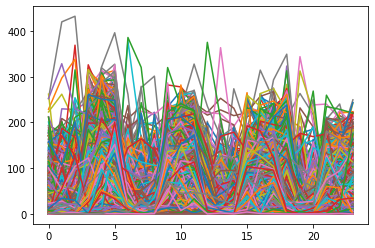

In [261]:
#''' # keep for checking
# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

print ("df_lpr_min.shape:" + str(df_lpr_min.shape))
# chemical.id 414 -> (181, 29)
# all 197 chemicals that have 240 variables -> (15718, 29)

#print (lpr_min.iloc[:1, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

cwd = os.getcwd()
print (cwd)

fig, ax = plt.subplots()

#ax.plot(np.transpose(lpr_min.iloc[10:223,time_index_start:time_index_start + num_time_points].values));
ax.plot(np.transpose(lpr_min.iloc[:,time_index_start:time_index_start + num_time_points].values));

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_all_conc.png"
plt.savefig(output_filename, bbox_inches="tight")

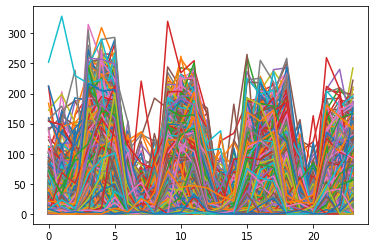

In [262]:
# just for 0 conc
#'''
#print (lpr_filtered_data_in_minute['conc'])

# lpr_filtered_data_in_minute_0_conc -> min_0_conc
df_lpr_min_0_conc = df_lpr_min.loc[df_lpr_min['conc'] == 0]

df_lpr_min_0_conc.head()
#print ("lpr_filtered_data_in_minute_0_conc.shape:" + str(lpr_filtered_data_in_minute_0_conc.shape))

# Plot few lpr curves to check transition points
# Plotting to make sure that data makes sense
time_index_start = 4 # because 0-3th columns show irrelevant values (e.g. chemical.id, conc, plate.id, well)
num_time_points = 24 # >= 25 will not make any difference

#print ("lpr_filtered_data_in_minute_0_conc.shape:" + str(lpr_filtered_data_in_minute_0_conc.shape))

fig, ax = plt.subplots()

#print (lpr_filtered_data_in_minute_0_conc.iloc[:11, time_index_start:time_index_start + num_time_points]) 
# first ':' shows rows, second ':' shows columns

ax.plot(np.transpose(df_lpr_min_0_conc.iloc[:,time_index_start:time_index_start + num_time_points].values));

complete_file_path_basename = os.path.basename(complete_file_path)
output_filename_wo_ext = os.path.splitext(complete_file_path_basename)[0]
output_filename = output_filename_wo_ext + "_0_conc.png"
plt.savefig(output_filename, bbox_inches="tight")

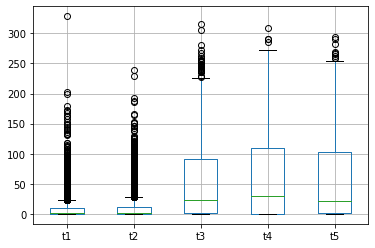

In [263]:
fig, ax = plt.subplots()
boxplot = df_lpr_min_0_conc.boxplot(column=['t1', 't2', 't3', 't4', 't5'])
#boxplot = lpr_min_0_conc.boxplot(column=['t13', 't14', 't15', 't16', 't17'])

In [264]:
## calculate MOV, AUC for 0 chemical concentration only

df_delta_0_conc = df_lpr_min_0_conc[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#'delta' was 'delta_mov_auc'

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            df_delta_0_conc['MOV' + str(trans_index + 1)] \
            = lpr_min['t' + str(trans_point + 1)] \
            - lpr_min['t' + str(trans_point)]
        else:
            df_delta_0_conc['AUC' + str(trans_index + 1)] \
            = sum(lpr_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(df_delta_0_conc.head(1))
df_delta_0_conc.to_csv("delta_mov_auc_0_conc.csv", index=False)

,chemical.id,conc,plate.id,well,MOV1,AUC1,MOV2,AUC2,MOV3,AUC3,MOV4,AUC4
11,53,0.0,9289,A12,0.0,2.8,13.6,13.6,0.0,34.3,-0.8,23.3


In [296]:
######## investigate whether AUC4 is negative

AUC1_mean_neg = AUC1_mean_pos = AUC2_mean_neg = AUC2_mean_pos = 0
AUC3_mean_neg = AUC3_mean_pos = AUC4_mean_neg = AUC4_mean_pos = 0

unique_chemical_id_s = np.unique(delta_0_conc['chemical.id'])
print (len(unique_chemical_id_s))
for i in range(len(unique_chemical_id_s)):
    chemical_id = unique_chemical_id_s[i]
    #if (chemical_id != 414):
    #    continue
    #print ("\n", chemical_id)
    per_chemical = delta_0_conc.loc[delta_0_conc['chemical.id'] == chemical_id]
    #display(per_chemical)
    #display(per_chemical["AUC4"].mean())

    AUC1_mean = float(per_chemical["AUC1"].mean())
    if (AUC1_mean) < 0:
        AUC1_mean_neg += 1
    else:
        AUC1_mean_pos += 1
            
    AUC2_mean = float(per_chemical["AUC2"].mean())
    if (AUC2_mean) < 0:
        AUC2_mean_neg += 1
    else:
        AUC2_mean_pos += 1
        
    AUC3_mean = float(per_chemical["AUC3"].mean())
    if (AUC3_mean) < 0:
        AUC3_mean_neg += 1
    else:
        AUC3_mean_pos += 1

    AUC4_mean = float(per_chemical["AUC4"].mean())
    if (AUC4_mean) < 0:
        AUC4_mean_neg += 1
    else:
        AUC4_mean_pos += 1

display(AUC1_mean_pos) # 100
display(AUC1_mean_neg) # 1

display(AUC2_mean_pos) # 100
display(AUC2_mean_neg) # 1

display(AUC3_mean_pos) # 100
display(AUC3_mean_neg) # 1

display(AUC4_mean_pos) # 62
display(AUC4_mean_neg) # 39
#display(AUC4_df.head())

101


100

1

100

1

100

1

62

39

In [266]:
## calculate MOV, AUC for all chemical concentrations

delta = lpr_in_min[['chemical.id', 'conc', 'plate.id', 'well']].copy()
#delta -> delta_mov_auc

trans_points = [2,8,14,20] # "official"
#trans_points = [2,8,15,21]
end_points = ['MOV', 'AUC']

num_light = 3 # seems reasonable since interval between middle points of each peak ~= 6
num_dark  = 3

for trans_index, trans_point in enumerate(trans_points):
#    print ("\ntrans_index:" + str(trans_index))
    print ("trans_point:" + str(trans_point))
    
    for just_index, end_point in enumerate(end_points):
        if (end_point == 'MOV'):
            delta['MOV' + str(trans_index + 1)] = lpr_min['t' + str(trans_point + 1)] - lpr_min['t' + str(trans_point)]
        else:
            delta['AUC' + str(trans_index + 1)] \
            = sum(lpr_in_min['t' + str(trans_point + 1 + index_count)] \
                  for index_count in range(num_dark)) \
            - sum(lpr_in_min['t' + str(trans_point - index_count)] \
                  for index_count in range(num_light))
        
display(delta.head(1))
delta.to_csv("delta_mov_auc.csv", index=False)

NameError: name 'lpr_in_min' is not defined

In [ ]:
# calculate new decreasing endpoints
delta_mov_auc_w_decreasing = delta_mov_auc.copy()
for transition_index, transition_point in enumerate(transition_points):
    print ("\ntransition_index:" + str(transition_index))
    print ("transition_point:" + str(transition_point))
    
    for just_index, end_point in enumerate(end_points):
        ori = str(end_point) + str(transition_index + 1)
        #print ("\nori:" + str(ori))
        #print ("delta_mov_auc_w_decreasing[ori]:\n" + str(delta_mov_auc_w_decreasing[ori]))
        
        for new_index in range(len(transition_points)-1):
            final_index = transition_index + new_index
            new = str(end_point) + str(final_index+2)
            #print ("new:" + str(new))
            check_whether_new_exists = new in delta_mov_auc_w_decreasing.columns
            #print ("check_whether_new_exists:"+str(check_whether_new_exists))
            if (check_whether_new_exists == False):
                continue
            name = str(end_point) + str(transition_index + 1) + "_" + str(new)
            print ("name:" + str(name))
            delta_mov_auc_w_decreasing[name] \
                = delta_mov_auc_w_decreasing[ori] - delta_mov_auc_w_decreasing[new]
display (delta_mov_auc_w_decreasing.head(1))

In [ ]:
# calculate final decreasing endpoints
delta_mov_auc_w_decreasing_copied = delta_mov_auc_w_decreasing.copy()
delta_mov_auc_final = delta_mov_auc_w_decreasing.copy()
columns_to_keep = []
for just_index, end_point in enumerate(end_points):
    for (columnName, columnData) in delta_mov_auc_w_decreasing_copied.iteritems():
        if "_" not in columnName:
            continue
        if str(end_point) not in columnName:
            continue
#        print('Colunm Name : ', columnName)
        columns_to_keep.append(columnName)

    delta_mov_auc_w_decreasing_copied_select = delta_mov_auc_w_decreasing_copied.loc[:,columns_to_keep]
    
    # "axis 0” represents rows
    # "axis 1” represents columns

    all_ = delta_mov_auc_w_decreasing_copied_select.sum(axis=1)
   # print ("all_:\n" + str(all_))
    
    final_endpoint_name = str(end_point) + "_all_" 
    delta_mov_auc_final.insert(0, final_endpoint_name, all_)
    

display("delta_mov_auc_final.head():", delta_mov_auc_final.head())
    
delta_mov_auc_final.to_csv("delta_mov_auc_final.csv",index=False)
    

In [ ]:
# Rename column headers to make it compatible with earlier data received from Lisa
delta_mov_auc.rename(columns={"chemical.id": "Chemical.ID", "conc": "CONC", "plate.id": "Plate", "well": "WELL"}, inplace = True)
display(delta_mov_auc.head())
#display(delta_mov_auc.tail())

In [ ]:
import generate_dose_response as gdr
import BMD_BMDL_estimation as bmdest
import Plot_Save as ps

In [ ]:
start_time = time.time()
os.chdir(starting_dir)

if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(delta_mov_auc['Chemical.ID'])
    end_points_from_here = ['MOV1','AUC1']
else:
    chemical_id_from_here = [53]
    end_points_from_here = ['MOV1']

#report = True
report = False

for chemical_id in chemical_id_from_here:
    if (report): print("chemical_id:" + str(chemical_id))
    for end_point in end_points_from_here:
        if (report): print("end_point:" + str(end_point))
        # subset original dataframe for a user-specified chemical and end_point pair
        delta_mov_auc_end_point_chemical_id = delta_mov_auc.loc[delta_mov_auc['Chemical.ID'] == chemical_id,['Chemical.ID', 'CONC', 'Plate', 'WELL', end_point]]
        #print("delta_mov_auc_end_point_chemical_id:\n"+str(delta_mov_auc_end_point_chemical_id))
        #print("type(delta_mov_auc_end_point_chemical_id):\n"+str(type(delta_mov_auc_end_point_chemical_id)))
        #print("type(end_point):\n"+str(type(end_point)))

        dose_response = gdr.gen_dose_response_behavior(delta_mov_auc_end_point_chemical_id, end_point)
        if (report): print("dose_response:\n"+str(dose_response))
        qc_flag = gdr.BMD_feasibility_analysis(dose_response)
        test_dose_response = gdr.reformat_dose_response(dose_response)
        #test_dose_response = dose_response
        if(qc_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                ps.save_results_good_data_unique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, qc_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, qc_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))
# 1 chemical (3756) and 2 endpoints (['MOV1','AUC1']), 140 seconds took
# 7 chemicals and 2 endpoints (['MOV1','AUC1']), 6 minutes took

time_filename = 'running_time.txt'
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close()